In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import seaborn as sns
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [9]:
df_Us = df[df["job_country"] == "United States"].copy()

In [10]:
df_Us =df_Us.dropna(subset="salary_year_avg")

In [24]:
job_titles = df_Us["job_title_short"].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [28]:
df_us_top6 = df_Us[df_Us["job_title_short"].isin(job_titles)]
df_us_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [39]:
job_order = df_us_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

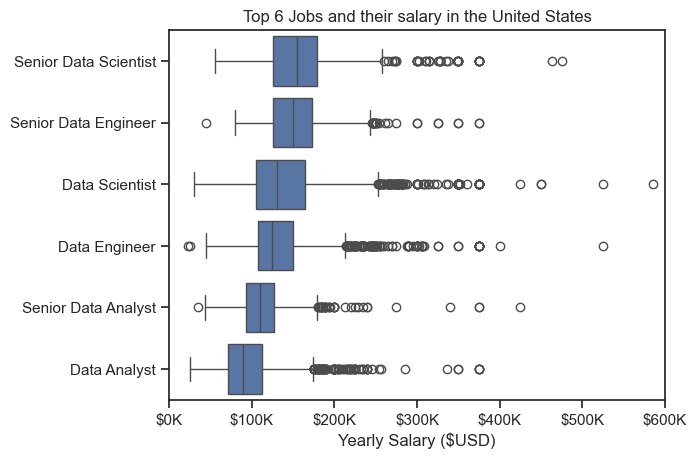

In [40]:
sns.boxplot(data=df_us_top6,x ="salary_year_avg",y="job_title_short",order=job_order)
sns.set_theme(style="ticks")
plt.title("Top 6 Jobs and their salary in the United States")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
plt.ylabel("")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
plt.xlim(0,600000)
plt.show()

In [45]:
df_da_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()



In [49]:
df_da_US.dropna(subset=["salary_year_avg"],inplace=True)

In [51]:
df_da_US =df_da_US.explode("job_skills")

In [54]:
df_da_skills =df_da_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"])

In [67]:
df_da_top_pay = df_da_skills.sort_values(by="median",ascending=False).head(10)

In [63]:
df_da_top_jobs = df_da_skills.sort_values(by="count",ascending=False).head(10)

In [70]:
df_da_top_jobs = df_da_top_jobs.sort_values(by= "median" ,ascending= False)

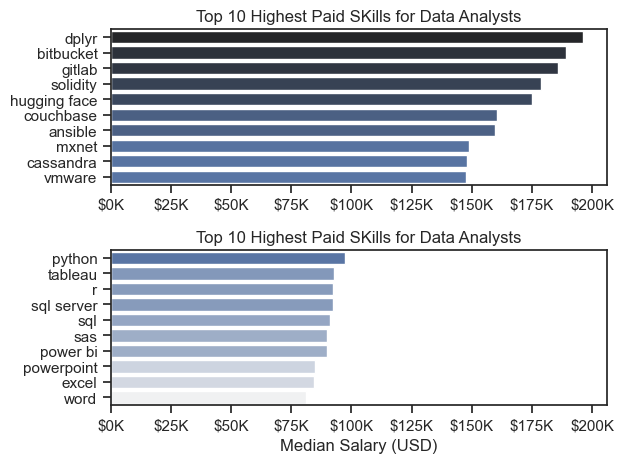

In [ ]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style= "ticks")

#df_DA_Us_Toppay[::-1].plot(kind = "barh",y = "median",ax= ax[0],legend= False)
sns.barplot(data= df_da_top_pay,x = "median",y = df_da_top_pay.index,ax = ax[0],hue= "median",palette="dark:b_r")
ax[0].set_title("Top 10 Highest Paid SKills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
ax[0].legend().remove()

#df_DA_Us_skills[::-1].plot(kind = "barh",y = "median",ax= ax[1],legend = False)

sns.barplot(data= df_da_top_jobs,x = "median",y = df_da_top_jobs.index,ax = ax[1],hue ="median",palette="light:b")
ax[1].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

plt.tight_layout()
plt.show()